In [10]:
from mosaic_pipeline import *

In [11]:
# 1. Extract features from gallery images (skip this step if already extracted)
extract_features_from_folder(
    folder_path="resized_tiles",
    method="combined",
    output_path="features_combined.pkl",
    w_color=0.8,
    w_hog=0.3,
    w_edge=0.2
)

# 2. Extract features from the main image tiles
extract_tile_features(
    image_path="snow-mountain-2085023_1920.jpg",
    tile_size=16,
    method="combined",
    output_path="main_image_tile_features.pkl",
    w_color=0.8,
    w_hog=0.3,
    w_edge=0.2
)



Extracting tile features (combined): 100%|█| 8040/8040 [00:10<00:00, 756.13it/s]


Reconstructing mosaic: 100%|█████████████| 8040/8040 [00:00<00:00, 15712.33it/s]


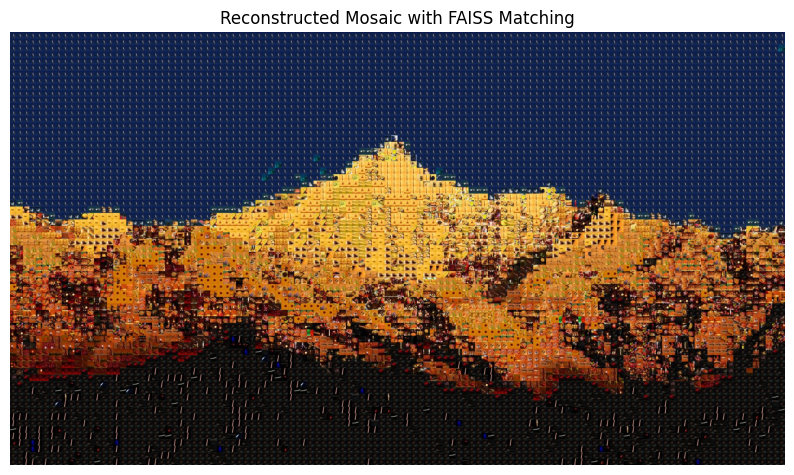

In [12]:
# 3. Match tiles to gallery images (using FAISS)
match_tiles_to_gallery_faiss(
    tile_feature_path="main_image_tile_features.pkl",
    gallery_feature_path="features_combined.pkl",
    output_match_path="matched_tile_to_gallery_faiss.pkl"
)

# 4. Reconstruct the mosaic image
reconstruct_mosaic_image(
    match_dict_path="matched_tile_to_gallery_faiss.pkl",
    gallery_folder="resized_tiles",
    tile_size=16,
    output_image_path="mosaic_output_faiss.jpg"
)

# 5. Display the result image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("mosaic_output_faiss.jpg")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.title("Reconstructed Mosaic with FAISS Matching")
plt.show()


Init 1/1 with method k-means++
Inertia for init 1/1: 588.796050227832
[MiniBatchKMeans] Reassigning 2 cluster centers.
Minibatch step 1/5000: mean batch inertia: 0.20196681097429267
Minibatch step 2/5000: mean batch inertia: 0.15137775274451917, ewa inertia: 0.15137775274451917
[MiniBatchKMeans] Reassigning 6 cluster centers.
Minibatch step 3/5000: mean batch inertia: 0.14636272165480665, ewa inertia: 0.1511771555128753
Minibatch step 4/5000: mean batch inertia: 0.1408478878580349, ewa inertia: 0.15076399306993055
Minibatch step 5/5000: mean batch inertia: 0.1390177184957845, ewa inertia: 0.15029415148379643
Minibatch step 6/5000: mean batch inertia: 0.1411950875649797, ewa inertia: 0.14993019620614934
[MiniBatchKMeans] Reassigning 1 cluster centers.
Minibatch step 7/5000: mean batch inertia: 0.1387306413791232, ewa inertia: 0.14948222297253297
Minibatch step 8/5000: mean batch inertia: 0.13635494815346447, ewa inertia: 0.14895714248138006
Minibatch step 9/5000: mean batch inertia: 0.1

Reconstructing mosaic: 100%|█████████████| 8040/8040 [00:00<00:00, 13859.73it/s]


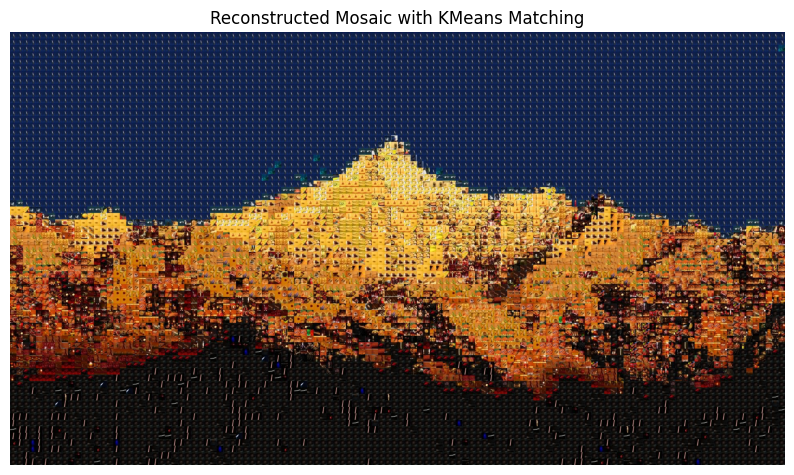

In [13]:
# 3. Match tiles to gallery images (using kmeans)
match_tiles_to_gallery_kmeans(
    tile_feature_path="main_image_tile_features.pkl",
    gallery_feature_path="features_combined.pkl",
    output_match_path="matched_tile_to_gallery_kmeans.pkl"
)

# 4. Reconstruct the mosaic image
reconstruct_mosaic_image(
    match_dict_path="matched_tile_to_gallery_kmeans.pkl",
    gallery_folder="resized_tiles",
    tile_size=16,
    output_image_path="mosaic_output_kmeans.jpg"
)

# 5. Display the result image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("mosaic_output_kmeans.jpg")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.title("Reconstructed Mosaic with KMeans Matching")
plt.show()